# Week 4

Context information: The dataset I used is the Statlog Heart Disease dataset from Kaggle, which includes 14 features related to cardiovascular health. The chosen project was based on cardiovascular disease (CVD). This project examines data related to CVD in order to analyze healthcare utilization and risk factors. The dataset, Statlog Heart Disease, included medical attributes from 270 individuals. These included blood pressure, cholesterol, and heart rate, utilizing said data to predict the presence of heart disease. The project strived to discover trends in healthcare to identify key risk factors for cardiovascular disease and thus inform on new strategies for disease prevention and management.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

In [4]:
df = pd.read_csv('Heart_disease_statlog.csv')

In [7]:
print("Shape:", df.shape)
display(df.head())
display(df.describe())
print("Missing values:\n", df.isnull().sum())

Shape: (270, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,70,1,3,130,322,0,2,109,0,2.4,1,3,1,1
1,67,0,2,115,564,0,2,160,0,1.6,1,0,3,0
2,57,1,1,124,261,0,0,141,0,0.3,0,0,3,1
3,64,1,3,128,263,0,0,105,1,0.2,1,1,3,0
4,74,0,1,120,269,0,2,121,1,0.2,0,1,1,0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,2.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,0.585185,0.670370,1.822222,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,0.959140,0.497827
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
50%,55.000000,1.000000,2.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,1.000000,0.000000,1.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,1.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,2.000000,3.000000,3.000000,1.000000


Missing values:
 age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [10]:
print(df.isnull().sum())
print(df.columns)

X = df.drop("target", axis=1)
y = df["target"]

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Logistic Regression Without Scaling

In [19]:
model_unscaled = LogisticRegression(max_iter=1000)
model_unscaled.fit(X_train, y_train)
y_pred_unscaled = model_unscaled.predict(X_test)

Logistic Regression With Scaling

In [22]:
model_scaled = LogisticRegression(max_iter=1000)
model_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = model_scaled.predict(X_test_scaled)

Accuracy Comparison

In [25]:
print("Accuracy (Unscaled):", accuracy_score(y_test, y_pred_unscaled))
print("Accuracy (Scaled):", accuracy_score(y_test, y_pred_scaled))

Accuracy (Unscaled): 0.9259259259259259
Accuracy (Scaled): 0.9259259259259259


Classification Report

In [28]:
print("\nClassification Report (Scaled):")
print(classification_report(y_test, y_pred_scaled))


Classification Report (Scaled):
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        33
           1       0.95      0.86      0.90        21

    accuracy                           0.93        54
   macro avg       0.93      0.91      0.92        54
weighted avg       0.93      0.93      0.93        54



Confusion Matrix

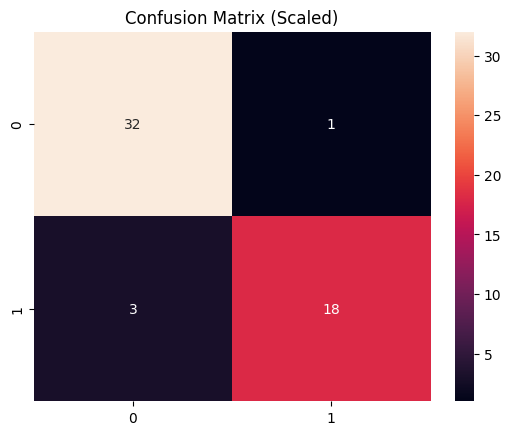

In [31]:
sns.heatmap(confusion_matrix(y_test, y_pred_scaled), annot=True, fmt='d')
plt.title("Confusion Matrix (Scaled)")
plt.show()

ROC Curve

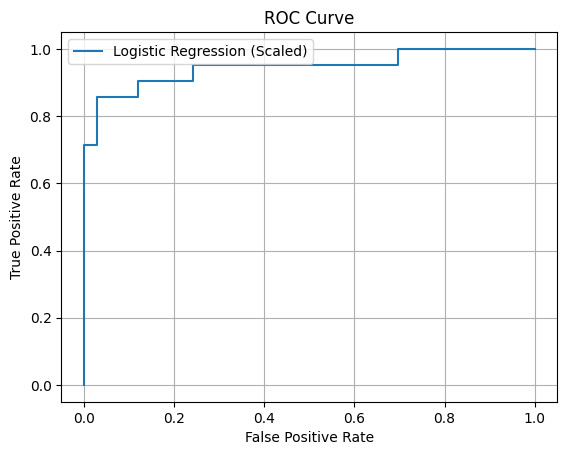

In [34]:
fpr, tpr, _ = roc_curve(y_test, model_scaled.predict_proba(X_test_scaled)[:,1])
plt.plot(fpr, tpr, label="Logistic Regression (Scaled)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()